# Learning to map with GeoPandas et al.

### 1. Make a map of the Connecticut

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import mplleaflet
import geopandas as gpd
#import geopy

import pandas as pd
from shapely.geometry import Point

# Homemade wrapper for Census geocoding API
from censuscoder import geocode

In [2]:
#ct = gpd.read_file("shapes/townct_37800_0000_2010_s100_census_1_shp/nad83/townct_37800_0000_2010_s100_census_1_shp_nad83_feet.shp")
#ct = gpd.read_file("shapes/townct_37800_0000_2010_s100_census_1_shp/wgs84/townct_37800_0000_2010_s100_census_1_shp_wgs84.shp")
#ct = gpd.read_file("shapes/geojson/towns.geojson")
ct = gpd.read_file("shapes/topojson/towns.topojson")

In [3]:
ct.head()

,id,STATEFP10,COUNTYFP10,COUSUBFP10,COUSUBNS10,GEOID10,NAME10,NAMELSAD10,LSAD10,CLASSFP10,...,NECTAFP10,NCTADVFP10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,GEOID_AFF2,GEOID_AFF1,geometry
0,None,09,001,00000,00000000,0900100000,County subdivisions not defined,County subdivisions not defined,00,Z9,...,,,F,0,302060009,+41.0779471,-073.2165184,0600000US0900100000,06000US0900100000,"POLYGON ((-72.9995505076111 41.0871192937099, ..."
1,None,09,001,04720,00213390,0900104720,Bethel,Bethel town,43,T1,...,72850,,A,43741119,100805,+41.3697777,-073.3895032,0600000US0900104720,06000US0900104720,"POLYGON ((-73.40596588056398 41.4282033499161,..."
2,None,09,001,08070,00213396,0900108070,Bridgeport,Bridgeport town,43,T5,...,71950,,C,41372169,8719037,+41.1873858,-073.1957339,0600000US0900108070,06000US0900108070,POLYGON ((-73.24416422707534 41.22660286522846...
3,None,09,001,08980,00213399,0900108980,Brookfield,Brookfield town,43,T1,...,72850,,A,51211648,1543913,+41.4698845,-073.3936666,0600000US0900108980,06000US0900108980,POLYGON ((-73.42694593336338 41.46384341853948...
4,None,09,001,18500,00213415,0900118500,Danbury,Danbury town,43,T5,...,72850,,C,108499386,5829369,+41.4018389,-073.4722848,0600000US0900118500,06000US0900118500,"POLYGON ((-73.40596588056398 41.4282033499161,..."


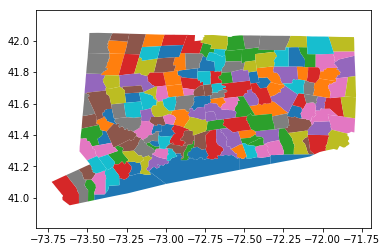

In [4]:
# Just an example of coloring _something_
ct.plot(column='COUSUBFP10')
lims = plt.axis('equal')
plt.show()

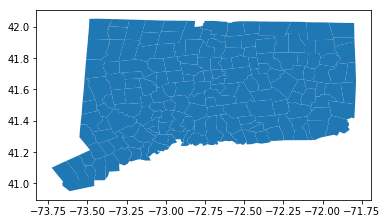

In [5]:
# Remove the non-land
ct = ct[ct["ALAND10"] != 0]
ct.plot()

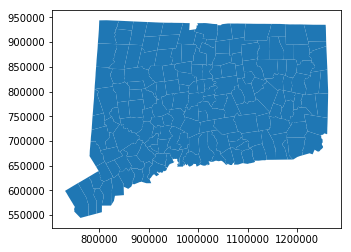

In [6]:
# Now reshape it
ct.crs = {'init' :'epsg:4326'} # The topojson needs to be initialized (as WGS84), other files don't
ct = ct.to_crs(epsg=2234)
ct.plot()

### 2. Make a map of Hartford

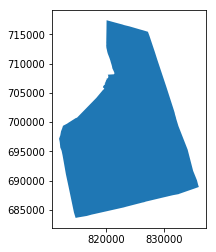

In [7]:
# Here's how to subset the shape file and plot an individual piece
ct[ct["NAME10"] == "Bethel"].plot()

In [8]:
hartford = ct[ct["NAME10"] == "Hartford"]
hartford = hartford.to_crs(epsg=2234)

In [9]:
hartford

,id,STATEFP10,COUNTYFP10,COUSUBFP10,COUSUBNS10,GEOID10,NAME10,NAMELSAD10,LSAD10,CLASSFP10,...,NECTAFP10,NCTADVFP10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,GEOID_AFF2,GEOID_AFF1,geometry
87,None,09,003,37070,00213442,0900337070,Hartford,Hartford town,43,T5,...,73450,,C,45016243,1748078,+41.7660453,-072.6833394,0600000US0900337070,06000US0900337070,"POLYGON ((1027888.748830061 825969.9209086939,..."


In [10]:
# Legislative office building - part of the Capitol complex in Hartford
LOB = geocode("210 capitol avenue hartford ct")
coords = LOB["result"]["addressMatches"][0]["coordinates"]
lob = Point(coords["x"],coords["y"])
lob.x

-72.6826

### Create a point

The geocode() function is defined in the censusgeocoder.py file also in this repo.

In [11]:
lob_df = gpd.GeoDataFrame([{
            "geometry":lob,
            "name":"Hartford"
        }])#.plot(markeredgecolor="black")

lob_df.crs = {'init' :'epsg:4326'}
lob_df = lob_df.to_crs(epsg=2234)

### Combine the point and the shape onto one plot

In [12]:
fig, ax = plt.subplots(1)
plt.close()

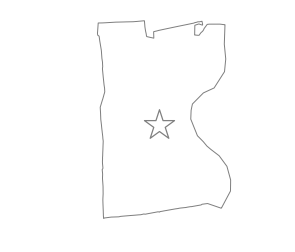

In [13]:
f, ax = plt.subplots(1, figsize=(4,4))
base = hartford.plot(ax=ax, color='white',edgecolor="gray")
lob_df.plot(ax=base,
            marker="*", 
            markersize=1000, 
            alpha=1,
            color='white', edgecolor='gray', linewidth=1.25)
_ = ax.axis('off')
lims = plt.axis('equal') # Fixes distortion issue

plt.show()

In [14]:
# Let's make it web-ified, but without getting into any of the deets
mplleaflet.display(fig=f, crs=hartford.crs)